## Import the Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import the data set

In [2]:
df = pd.read_csv('Absenteeism_preprocessed4.csv')

In [3]:
df.head()

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_for_Absence,month,Day of year,Day of week
0,289,36,33,239.554,30,1,2,1,4,0.044286,7,188,1
1,118,13,50,239.554,31,1,1,0,0,0.054286,7,195,1
2,179,51,38,239.554,31,1,0,0,2,0.210000,7,196,2
3,279,5,39,239.554,24,1,2,0,4,0.018571,7,197,3
4,289,36,33,239.554,30,1,2,1,2,0.210000,7,204,3


In [4]:
df['Education'].nunique()

4

## Targets

In [5]:
df['Absenteeism Time in Hours'].median()

3.0

**If Values is >3 then targe is 1 or else 0**

In [6]:
targets= np.where(df['Absenteeism Time in Hours']>3,0,1)

In [7]:
df['Excessive Absentees']=targets

In [8]:
df=df.drop('Absenteeism Time in Hours',axis=1)

In [9]:
df.head()

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Reason_for_Absence,month,Day of year,Day of week,Excessive Absentees
0,289,36,33,239.554,30,1,2,1,0.044286,7,188,1,0
1,118,13,50,239.554,31,1,1,0,0.054286,7,195,1,1
2,179,51,38,239.554,31,1,0,0,0.210000,7,196,2,1
3,279,5,39,239.554,24,1,2,0,0.018571,7,197,3,0
4,289,36,33,239.554,30,1,2,1,0.210000,7,204,3,1


In [10]:
df['Excessive Absentees'].value_counts()

1    381
0    319
Name: Excessive Absentees, dtype: int64

## Splitting the data

In [11]:
X= df.drop('Excessive Absentees',axis=1)
y= df['Excessive Absentees']

In [12]:
X.head()

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Reason_for_Absence,month,Day of year,Day of week
0,289,36,33,239.554,30,1,2,1,0.044286,7,188,1
1,118,13,50,239.554,31,1,1,0,0.054286,7,195,1
2,179,51,38,239.554,31,1,0,0,0.210000,7,196,2
3,279,5,39,239.554,24,1,2,0,0.018571,7,197,3
4,289,36,33,239.554,30,1,2,1,0.210000,7,204,3


In [13]:
y.head()

0    0
1    1
2    1
3    0
4    1
Name: Excessive Absentees, dtype: int32

In [14]:
from scipy import stats
df[(np.abs(stats.zscore(df))<3).all(axis=1)]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Transportation Expense   700 non-null    int64  
 1   Distance to Work         700 non-null    int64  
 2   Age                      700 non-null    int64  
 3   Daily Work Load Average  700 non-null    float64
 4   Body Mass Index          700 non-null    int64  
 5   Education                700 non-null    int64  
 6   Children                 700 non-null    int64  
 7   Pets                     700 non-null    int64  
 8   Reason_for_Absence       700 non-null    float64
 9   month                    700 non-null    int64  
 10  Day of year              700 non-null    int64  
 11  Day of week              700 non-null    int64  
 12  Excessive Absentees      700 non-null    int32  
dtypes: float64(2), int32(1), int64(10)
memory usage: 68.5 KB


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardizing Data

In [17]:
from sklearn.preprocessing import StandardScaler
Sc= StandardScaler()

In [18]:
X_train= Sc.fit_transform(X_train)
X_test= Sc.transform(X_test)

## ML Model

### RandomForestClassifier

In [19]:
from sklearn.ensemble import RandomForestClassifier 
M1= RandomForestClassifier()

In [20]:
M1.fit(X_train,y_train)

RandomForestClassifier()

In [21]:
M1.feature_importances_

array([0.08619353, 0.04757087, 0.05145071, 0.1223712 , 0.04253187,
       0.01350663, 0.03160123, 0.01584759, 0.30389814, 0.07529611,
       0.13635445, 0.07337765])

In [22]:
P1=M1.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,accuracy_score
print(classification_report(y_test,P1))
print('\n')
print(confusion_matrix(y_test, P1))
print('\n')
print(accuracy_score(y_test, P1))
print('\n')
accuracy = accuracy_score(y_test, P1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P1))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.81      0.76      0.79        58
           1       0.84      0.88      0.86        82

    accuracy                           0.83       140
   macro avg       0.83      0.82      0.82       140
weighted avg       0.83      0.83      0.83       140



[[44 14]
 [10 72]]


0.8285714285714286


Accuracy: 82.86%
ROC AUC Score 0.8183347350714886


### Predictions and Evaluations From Top feature

In [24]:
from sklearn.feature_selection import RFE

In [25]:
M2 = RFE(M1,n_features_to_select=4)

In [26]:
M2.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(), n_features_to_select=4)

In [27]:
P2=M2.predict(X_test)

In [28]:
print(classification_report(y_test,P2))
print('\n')
print(confusion_matrix(y_test, P2))
print('\n')
print(accuracy_score(y_test, P2))
print('\n')
accuracy = accuracy_score(y_test, P2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P2))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.76      0.78      0.77        58
           1       0.84      0.83      0.83        82

    accuracy                           0.81       140
   macro avg       0.80      0.80      0.80       140
weighted avg       0.81      0.81      0.81       140



[[45 13]
 [14 68]]


0.8071428571428572


Accuracy: 80.71%
ROC AUC Score 0.802565180824222


## Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
M3=DecisionTreeClassifier()

In [30]:
M3.fit(X_train,y_train)

DecisionTreeClassifier()

In [31]:
P3= M3.predict(X_test)

In [32]:
print(classification_report(y_test,P3))
print('\n')
print(confusion_matrix(y_test, P3))
print('\n')
print(accuracy_score(y_test, P3))
print('\n')
accuracy = accuracy_score(y_test, P3)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P3))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.71      0.69      0.70        58
           1       0.79      0.80      0.80        82

    accuracy                           0.76       140
   macro avg       0.75      0.75      0.75       140
weighted avg       0.76      0.76      0.76       140



[[40 18]
 [16 66]]


0.7571428571428571


Accuracy: 75.71%
ROC AUC Score 0.7472666105971406


## Support Vector Machine

In [33]:
from sklearn.svm import SVC

In [34]:
M4= SVC()

In [35]:
M4.fit(X_train,y_train)

SVC()

In [36]:
P4= M4.predict(X_test)

In [37]:
print(classification_report(y_test,P4))
print('\n')
print(confusion_matrix(y_test, P4))
print('\n')
print(accuracy_score(y_test, P4))
print('\n')
accuracy = accuracy_score(y_test, P4)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P4))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.69      0.78      0.73        58
           1       0.83      0.76      0.79        82

    accuracy                           0.76       140
   macro avg       0.76      0.77      0.76       140
weighted avg       0.77      0.76      0.77       140



[[45 13]
 [20 62]]


0.7642857142857142


Accuracy: 76.43%
ROC AUC Score 0.7659798149705634


### Gridsearch

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
param_grid = {'C': [0.1,1, 10, 100, 1000,10000], 'gamma': [1,0.1,0.01,0.001,0.0001]} 

In [40]:
gr=GridSearchCV(SVC(),param_grid)

In [41]:
gr.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]})

In [42]:
gr.best_estimator_

SVC(C=1000, gamma=0.0001)

In [43]:
P4=gr.predict(X_test)

In [44]:
print(classification_report(y_test,P4))
print('\n')
print(confusion_matrix(y_test, P4))
print('\n')
print(accuracy_score(y_test, P4))
print('\n')
accuracy = accuracy_score(y_test, P4)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P4))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.67      0.71      0.69        58
           1       0.78      0.76      0.77        82

    accuracy                           0.74       140
   macro avg       0.73      0.73      0.73       140
weighted avg       0.74      0.74      0.74       140



[[41 17]
 [20 62]]


0.7357142857142858


Accuracy: 73.57%
ROC AUC Score 0.7314970563498738


## Naive Bayes classifier

In [45]:
from sklearn.naive_bayes import GaussianNB
M5=GaussianNB()

In [46]:
M5.fit(X_train,y_train)

GaussianNB()

In [47]:
P5=M5.predict(X_test)

In [48]:
print(classification_report(y_test,P5))
print('\n')
print(confusion_matrix(y_test, P5))
print('\n')
print(accuracy_score(y_test, P5))
print('\n')
accuracy = accuracy_score(y_test, P5)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P5))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.67      0.59      0.62        58
           1       0.73      0.79      0.76        82

    accuracy                           0.71       140
   macro avg       0.70      0.69      0.69       140
weighted avg       0.70      0.71      0.70       140



[[34 24]
 [17 65]]


0.7071428571428572


Accuracy: 70.71%
ROC AUC Score 0.6894449116904964


## KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
error_Mat=[]
for i in range (1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predict_i=knn.predict(X_test)
    error_Mat.append(np.mean(predict_i != y_test))

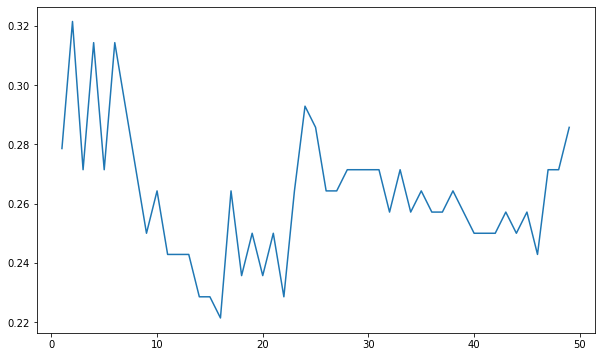

In [51]:
plt.figure(figsize=(10,6))
plt.plot(range (1,50),error_Mat)

In [52]:
M6= KNeighborsClassifier(n_neighbors=22)

In [53]:
M6.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=22)

In [54]:
P6=M6.predict(X_test)

In [55]:
print(classification_report(y_test,P6))
print('\n')
print(confusion_matrix(y_test, P6))
print('\n')
print(accuracy_score(y_test, P6))
print('\n')
accuracy = accuracy_score(y_test, P6)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P6))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.72      0.74      0.73        58
           1       0.81      0.79      0.80        82

    accuracy                           0.77       140
   macro avg       0.76      0.77      0.77       140
weighted avg       0.77      0.77      0.77       140



[[43 15]
 [17 65]]


0.7714285714285715


Accuracy: 77.14%
ROC AUC Score 0.7670311185870481


## LogisticRegression

In [56]:
from sklearn.linear_model import LogisticRegression
M7= LogisticRegression()

In [57]:
M7.fit(X_train,y_train)

LogisticRegression()

In [58]:
P7 = M7.predict(X_test)

In [59]:
print(classification_report(y_test,P7))
print('\n')
print(confusion_matrix(y_test, P7))
print('\n')
print(accuracy_score(y_test, P7))
print('\n')
accuracy = accuracy_score(y_test, P7)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P7))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.68      0.78      0.73        58
           1       0.82      0.74      0.78        82

    accuracy                           0.76       140
   macro avg       0.75      0.76      0.75       140
weighted avg       0.77      0.76      0.76       140



[[45 13]
 [21 61]]


0.7571428571428571


Accuracy: 75.71%
ROC AUC Score 0.7598822539949537


## GB Boosting

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

In [61]:
M8=GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=2)

In [62]:
M8.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1, max_depth=2)

In [63]:
P8=M8.predict(X_test)

In [64]:
print(classification_report(y_test,P8))
print('\n')
print(confusion_matrix(y_test, P8))
print('\n')
print(accuracy_score(y_test, P8))
print('\n')
accuracy = accuracy_score(y_test, P8)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P8))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        58
           1       0.87      0.84      0.86        82

    accuracy                           0.84       140
   macro avg       0.83      0.83      0.83       140
weighted avg       0.84      0.84      0.84       140



[[48 10]
 [13 69]]


0.8357142857142857


Accuracy: 83.57%
ROC AUC Score 0.8345248107653489


## Histogram Boosting Classifier

In [65]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [66]:
M9= HistGradientBoostingClassifier()

In [67]:
M9.fit(X_train,y_train)

HistGradientBoostingClassifier()

In [68]:
P9=M9.predict(X_test)

In [69]:
print(classification_report(y_test,P9))
print('\n')
print(confusion_matrix(y_test, P9))
print('\n')
print(accuracy_score(y_test, P9))
print('\n')
accuracy = accuracy_score(y_test, P9)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P9))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.82      0.79      0.81        58
           1       0.86      0.88      0.87        82

    accuracy                           0.84       140
   macro avg       0.84      0.84      0.84       140
weighted avg       0.84      0.84      0.84       140



[[46 12]
 [10 72]]


0.8428571428571429


Accuracy: 84.29%
ROC AUC Score 0.8355761143818334


## XGB Boosting

In [70]:
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [71]:
M10=XGBClassifier()

In [72]:
from sklearn.model_selection import KFold , cross_val_score

In [73]:
kfold= KFold(n_splits=6, shuffle=False, random_state=None)
scores= cross_val_score(M10, X_train, y_train, cv=kfold,verbose=False)

[12:37:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [74]:
scores

array([0.73404255, 0.79787234, 0.7311828 , 0.76344086, 0.79569892,
       0.75268817])

In [75]:
M10.fit(X_train,y_train)

[12:37:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [76]:
P10= M10.predict(X_test)

In [77]:
print(classification_report(y_test,P10))
print('\n')
print(confusion_matrix(y_test, P10))
print('\n')
print(accuracy_score(y_test, P10))
print('\n')
accuracy = accuracy_score(y_test, P10)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P10))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        58
           1       0.85      0.85      0.85        82

    accuracy                           0.83       140
   macro avg       0.82      0.82      0.82       140
weighted avg       0.83      0.83      0.83       140



[[46 12]
 [12 70]]


0.8285714285714286


Accuracy: 82.86%
ROC AUC Score 0.8233809924306139


## Light GBM

In [78]:
from lightgbm import LGBMClassifier

In [79]:
M11=LGBMClassifier()

In [80]:
Kfold=KFold(n_splits=5, shuffle=False, random_state=None)
score=cross_val_score(M11,X_train,y_train,cv=Kfold)
score

array([0.72321429, 0.80357143, 0.74107143, 0.77678571, 0.75      ])

In [81]:
M11.fit(X_train,y_train)

LGBMClassifier()

In [82]:
P11=M11.predict(X_test)

In [83]:
print(classification_report(y_test,P11))
print('\n')
print(confusion_matrix(y_test, P11))
print('\n')
print(accuracy_score(y_test, P11))
print('\n')
accuracy = accuracy_score(y_test, P11)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P11))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.82      0.79      0.81        58
           1       0.86      0.88      0.87        82

    accuracy                           0.84       140
   macro avg       0.84      0.84      0.84       140
weighted avg       0.84      0.84      0.84       140



[[46 12]
 [10 72]]


0.8428571428571429


Accuracy: 84.29%
ROC AUC Score 0.8355761143818334


## CAT Boosting

In [84]:
from catboost import CatBoostClassifier

In [85]:
M12= CatBoostClassifier()

In [86]:
score=cross_val_score(M12,X_train,y_train,cv=kfold,verbose=False)

Learning rate set to 0.007436
0:	learn: 0.6892910	total: 156ms	remaining: 2m 35s
1:	learn: 0.6865022	total: 166ms	remaining: 1m 22s
2:	learn: 0.6832807	total: 174ms	remaining: 57.9s
3:	learn: 0.6800799	total: 179ms	remaining: 44.7s
4:	learn: 0.6765090	total: 184ms	remaining: 36.7s
5:	learn: 0.6730096	total: 189ms	remaining: 31.3s
6:	learn: 0.6703319	total: 193ms	remaining: 27.4s
7:	learn: 0.6669753	total: 197ms	remaining: 24.5s
8:	learn: 0.6640836	total: 201ms	remaining: 22.2s
9:	learn: 0.6616887	total: 203ms	remaining: 20.1s
10:	learn: 0.6582308	total: 207ms	remaining: 18.6s
11:	learn: 0.6557530	total: 210ms	remaining: 17.3s
12:	learn: 0.6529573	total: 213ms	remaining: 16.1s
13:	learn: 0.6507018	total: 216ms	remaining: 15.2s
14:	learn: 0.6478023	total: 219ms	remaining: 14.4s
15:	learn: 0.6443701	total: 222ms	remaining: 13.6s
16:	learn: 0.6413980	total: 225ms	remaining: 13s
17:	learn: 0.6386846	total: 228ms	remaining: 12.4s
18:	learn: 0.6360460	total: 231ms	remaining: 11.9s
19:	learn: 

182:	learn: 0.4243375	total: 685ms	remaining: 3.06s
183:	learn: 0.4234478	total: 687ms	remaining: 3.05s
184:	learn: 0.4230282	total: 690ms	remaining: 3.04s
185:	learn: 0.4221610	total: 693ms	remaining: 3.03s
186:	learn: 0.4210798	total: 696ms	remaining: 3.02s
187:	learn: 0.4206729	total: 698ms	remaining: 3.02s
188:	learn: 0.4202466	total: 701ms	remaining: 3.01s
189:	learn: 0.4195699	total: 704ms	remaining: 3s
190:	learn: 0.4187216	total: 707ms	remaining: 2.99s
191:	learn: 0.4179327	total: 710ms	remaining: 2.99s
192:	learn: 0.4172990	total: 713ms	remaining: 2.98s
193:	learn: 0.4170158	total: 716ms	remaining: 2.98s
194:	learn: 0.4164183	total: 719ms	remaining: 2.97s
195:	learn: 0.4161355	total: 722ms	remaining: 2.96s
196:	learn: 0.4156621	total: 725ms	remaining: 2.96s
197:	learn: 0.4149755	total: 728ms	remaining: 2.95s
198:	learn: 0.4145303	total: 731ms	remaining: 2.94s
199:	learn: 0.4137137	total: 734ms	remaining: 2.94s
200:	learn: 0.4134035	total: 737ms	remaining: 2.93s
201:	learn: 0.4

368:	learn: 0.3457315	total: 1.19s	remaining: 2.04s
369:	learn: 0.3454996	total: 1.2s	remaining: 2.04s
370:	learn: 0.3450745	total: 1.2s	remaining: 2.03s
371:	learn: 0.3446399	total: 1.2s	remaining: 2.03s
372:	learn: 0.3443214	total: 1.2s	remaining: 2.02s
373:	learn: 0.3439861	total: 1.21s	remaining: 2.02s
374:	learn: 0.3436492	total: 1.21s	remaining: 2.02s
375:	learn: 0.3436353	total: 1.21s	remaining: 2.01s
376:	learn: 0.3433855	total: 1.21s	remaining: 2s
377:	learn: 0.3430169	total: 1.22s	remaining: 2s
378:	learn: 0.3428525	total: 1.22s	remaining: 2s
379:	learn: 0.3427319	total: 1.22s	remaining: 1.99s
380:	learn: 0.3426022	total: 1.23s	remaining: 1.99s
381:	learn: 0.3420745	total: 1.23s	remaining: 1.99s
382:	learn: 0.3417050	total: 1.23s	remaining: 1.98s
383:	learn: 0.3414180	total: 1.23s	remaining: 1.98s
384:	learn: 0.3411242	total: 1.24s	remaining: 1.97s
385:	learn: 0.3406984	total: 1.24s	remaining: 1.97s
386:	learn: 0.3402978	total: 1.24s	remaining: 1.97s
387:	learn: 0.3400139	tot

558:	learn: 0.2979041	total: 1.7s	remaining: 1.34s
559:	learn: 0.2975716	total: 1.71s	remaining: 1.34s
560:	learn: 0.2973830	total: 1.71s	remaining: 1.34s
561:	learn: 0.2970997	total: 1.71s	remaining: 1.33s
562:	learn: 0.2969582	total: 1.71s	remaining: 1.33s
563:	learn: 0.2966650	total: 1.72s	remaining: 1.33s
564:	learn: 0.2964150	total: 1.72s	remaining: 1.32s
565:	learn: 0.2962268	total: 1.72s	remaining: 1.32s
566:	learn: 0.2960876	total: 1.73s	remaining: 1.32s
567:	learn: 0.2959202	total: 1.73s	remaining: 1.31s
568:	learn: 0.2957170	total: 1.73s	remaining: 1.31s
569:	learn: 0.2954224	total: 1.73s	remaining: 1.31s
570:	learn: 0.2950591	total: 1.74s	remaining: 1.3s
571:	learn: 0.2948026	total: 1.74s	remaining: 1.3s
572:	learn: 0.2947307	total: 1.74s	remaining: 1.3s
573:	learn: 0.2945505	total: 1.75s	remaining: 1.29s
574:	learn: 0.2943955	total: 1.75s	remaining: 1.29s
575:	learn: 0.2941828	total: 1.75s	remaining: 1.29s
576:	learn: 0.2939629	total: 1.75s	remaining: 1.28s
577:	learn: 0.29

748:	learn: 0.2591372	total: 2.21s	remaining: 742ms
749:	learn: 0.2589942	total: 2.22s	remaining: 739ms
750:	learn: 0.2588329	total: 2.22s	remaining: 736ms
751:	learn: 0.2585214	total: 2.22s	remaining: 733ms
752:	learn: 0.2582843	total: 2.22s	remaining: 730ms
753:	learn: 0.2580427	total: 2.23s	remaining: 727ms
754:	learn: 0.2578801	total: 2.23s	remaining: 724ms
755:	learn: 0.2577372	total: 2.23s	remaining: 721ms
756:	learn: 0.2575969	total: 2.23s	remaining: 718ms
757:	learn: 0.2573999	total: 2.24s	remaining: 715ms
758:	learn: 0.2571888	total: 2.24s	remaining: 712ms
759:	learn: 0.2569924	total: 2.24s	remaining: 709ms
760:	learn: 0.2568757	total: 2.25s	remaining: 706ms
761:	learn: 0.2567283	total: 2.25s	remaining: 703ms
762:	learn: 0.2566214	total: 2.25s	remaining: 700ms
763:	learn: 0.2563607	total: 2.26s	remaining: 697ms
764:	learn: 0.2561669	total: 2.26s	remaining: 694ms
765:	learn: 0.2560775	total: 2.26s	remaining: 691ms
766:	learn: 0.2555647	total: 2.26s	remaining: 688ms
767:	learn: 

938:	learn: 0.2237386	total: 2.72s	remaining: 177ms
939:	learn: 0.2236275	total: 2.72s	remaining: 174ms
940:	learn: 0.2234335	total: 2.73s	remaining: 171ms
941:	learn: 0.2232519	total: 2.73s	remaining: 168ms
942:	learn: 0.2229592	total: 2.73s	remaining: 165ms
943:	learn: 0.2228612	total: 2.74s	remaining: 162ms
944:	learn: 0.2225873	total: 2.74s	remaining: 159ms
945:	learn: 0.2223823	total: 2.74s	remaining: 157ms
946:	learn: 0.2222369	total: 2.74s	remaining: 154ms
947:	learn: 0.2221771	total: 2.75s	remaining: 151ms
948:	learn: 0.2220007	total: 2.75s	remaining: 148ms
949:	learn: 0.2218933	total: 2.75s	remaining: 145ms
950:	learn: 0.2217427	total: 2.76s	remaining: 142ms
951:	learn: 0.2215022	total: 2.76s	remaining: 139ms
952:	learn: 0.2212699	total: 2.76s	remaining: 136ms
953:	learn: 0.2211277	total: 2.76s	remaining: 133ms
954:	learn: 0.2209914	total: 2.77s	remaining: 130ms
955:	learn: 0.2207431	total: 2.77s	remaining: 128ms
956:	learn: 0.2205297	total: 2.77s	remaining: 125ms
957:	learn: 

122:	learn: 0.4814168	total: 334ms	remaining: 2.38s
123:	learn: 0.4807097	total: 337ms	remaining: 2.38s
124:	learn: 0.4797474	total: 340ms	remaining: 2.38s
125:	learn: 0.4789215	total: 343ms	remaining: 2.38s
126:	learn: 0.4781509	total: 346ms	remaining: 2.38s
127:	learn: 0.4770931	total: 349ms	remaining: 2.37s
128:	learn: 0.4761142	total: 352ms	remaining: 2.37s
129:	learn: 0.4750037	total: 354ms	remaining: 2.37s
130:	learn: 0.4737496	total: 357ms	remaining: 2.37s
131:	learn: 0.4727376	total: 359ms	remaining: 2.36s
132:	learn: 0.4721257	total: 362ms	remaining: 2.36s
133:	learn: 0.4711507	total: 365ms	remaining: 2.36s
134:	learn: 0.4701708	total: 368ms	remaining: 2.36s
135:	learn: 0.4691013	total: 371ms	remaining: 2.35s
136:	learn: 0.4685439	total: 373ms	remaining: 2.35s
137:	learn: 0.4680904	total: 376ms	remaining: 2.35s
138:	learn: 0.4671628	total: 379ms	remaining: 2.34s
139:	learn: 0.4665557	total: 382ms	remaining: 2.34s
140:	learn: 0.4660978	total: 384ms	remaining: 2.34s
141:	learn: 

308:	learn: 0.3798766	total: 841ms	remaining: 1.88s
309:	learn: 0.3796679	total: 844ms	remaining: 1.88s
310:	learn: 0.3792758	total: 846ms	remaining: 1.87s
311:	learn: 0.3784951	total: 849ms	remaining: 1.87s
312:	learn: 0.3780807	total: 852ms	remaining: 1.87s
313:	learn: 0.3776115	total: 854ms	remaining: 1.87s
314:	learn: 0.3771194	total: 857ms	remaining: 1.86s
315:	learn: 0.3764754	total: 860ms	remaining: 1.86s
316:	learn: 0.3763061	total: 863ms	remaining: 1.86s
317:	learn: 0.3759550	total: 865ms	remaining: 1.85s
318:	learn: 0.3756160	total: 868ms	remaining: 1.85s
319:	learn: 0.3752177	total: 872ms	remaining: 1.85s
320:	learn: 0.3748910	total: 875ms	remaining: 1.85s
321:	learn: 0.3744470	total: 878ms	remaining: 1.85s
322:	learn: 0.3739355	total: 881ms	remaining: 1.85s
323:	learn: 0.3734077	total: 883ms	remaining: 1.84s
324:	learn: 0.3731308	total: 887ms	remaining: 1.84s
325:	learn: 0.3727094	total: 890ms	remaining: 1.84s
326:	learn: 0.3726003	total: 893ms	remaining: 1.84s
327:	learn: 

470:	learn: 0.3303649	total: 1.33s	remaining: 1.5s
471:	learn: 0.3301879	total: 1.34s	remaining: 1.5s
472:	learn: 0.3299335	total: 1.34s	remaining: 1.49s
473:	learn: 0.3297999	total: 1.34s	remaining: 1.49s
474:	learn: 0.3296384	total: 1.35s	remaining: 1.49s
475:	learn: 0.3294867	total: 1.35s	remaining: 1.49s
476:	learn: 0.3292339	total: 1.35s	remaining: 1.48s
477:	learn: 0.3290066	total: 1.35s	remaining: 1.48s
478:	learn: 0.3287635	total: 1.36s	remaining: 1.48s
479:	learn: 0.3285048	total: 1.36s	remaining: 1.47s
480:	learn: 0.3282367	total: 1.36s	remaining: 1.47s
481:	learn: 0.3279090	total: 1.37s	remaining: 1.47s
482:	learn: 0.3277553	total: 1.37s	remaining: 1.47s
483:	learn: 0.3275412	total: 1.37s	remaining: 1.46s
484:	learn: 0.3273952	total: 1.37s	remaining: 1.46s
485:	learn: 0.3269326	total: 1.38s	remaining: 1.46s
486:	learn: 0.3267647	total: 1.38s	remaining: 1.45s
487:	learn: 0.3265120	total: 1.38s	remaining: 1.45s
488:	learn: 0.3262445	total: 1.39s	remaining: 1.45s
489:	learn: 0.

648:	learn: 0.2883485	total: 1.83s	remaining: 992ms
649:	learn: 0.2881991	total: 1.84s	remaining: 990ms
650:	learn: 0.2879124	total: 1.84s	remaining: 987ms
651:	learn: 0.2877913	total: 1.84s	remaining: 984ms
652:	learn: 0.2876970	total: 1.84s	remaining: 981ms
653:	learn: 0.2875735	total: 1.85s	remaining: 978ms
654:	learn: 0.2872823	total: 1.85s	remaining: 975ms
655:	learn: 0.2871823	total: 1.85s	remaining: 972ms
656:	learn: 0.2868747	total: 1.86s	remaining: 969ms
657:	learn: 0.2867581	total: 1.86s	remaining: 966ms
658:	learn: 0.2865229	total: 1.86s	remaining: 964ms
659:	learn: 0.2861266	total: 1.86s	remaining: 961ms
660:	learn: 0.2860009	total: 1.87s	remaining: 958ms
661:	learn: 0.2858506	total: 1.87s	remaining: 955ms
662:	learn: 0.2855437	total: 1.87s	remaining: 952ms
663:	learn: 0.2853112	total: 1.88s	remaining: 949ms
664:	learn: 0.2851787	total: 1.88s	remaining: 947ms
665:	learn: 0.2849520	total: 1.88s	remaining: 944ms
666:	learn: 0.2847768	total: 1.88s	remaining: 941ms
667:	learn: 

826:	learn: 0.2509514	total: 2.34s	remaining: 490ms
827:	learn: 0.2506687	total: 2.35s	remaining: 487ms
828:	learn: 0.2504038	total: 2.35s	remaining: 484ms
829:	learn: 0.2500588	total: 2.35s	remaining: 481ms
830:	learn: 0.2497612	total: 2.35s	remaining: 479ms
831:	learn: 0.2496444	total: 2.36s	remaining: 476ms
832:	learn: 0.2495154	total: 2.36s	remaining: 473ms
833:	learn: 0.2493246	total: 2.36s	remaining: 470ms
834:	learn: 0.2490843	total: 2.37s	remaining: 467ms
835:	learn: 0.2489184	total: 2.37s	remaining: 464ms
836:	learn: 0.2487484	total: 2.37s	remaining: 462ms
837:	learn: 0.2485997	total: 2.37s	remaining: 459ms
838:	learn: 0.2483663	total: 2.38s	remaining: 456ms
839:	learn: 0.2482139	total: 2.38s	remaining: 453ms
840:	learn: 0.2480400	total: 2.38s	remaining: 450ms
841:	learn: 0.2478650	total: 2.38s	remaining: 447ms
842:	learn: 0.2475559	total: 2.39s	remaining: 445ms
843:	learn: 0.2471108	total: 2.39s	remaining: 442ms
844:	learn: 0.2469096	total: 2.39s	remaining: 439ms
845:	learn: 

Learning rate set to 0.007443
0:	learn: 0.6895560	total: 7.77ms	remaining: 7.76s
1:	learn: 0.6869780	total: 14.9ms	remaining: 7.45s
2:	learn: 0.6835710	total: 18.7ms	remaining: 6.2s
3:	learn: 0.6807147	total: 22.3ms	remaining: 5.55s
4:	learn: 0.6774565	total: 25.7ms	remaining: 5.12s
5:	learn: 0.6742815	total: 29.3ms	remaining: 4.85s
6:	learn: 0.6715477	total: 33.3ms	remaining: 4.73s
7:	learn: 0.6685063	total: 36.7ms	remaining: 4.55s
8:	learn: 0.6653876	total: 40.2ms	remaining: 4.42s
9:	learn: 0.6628982	total: 43.4ms	remaining: 4.29s
10:	learn: 0.6605087	total: 46.3ms	remaining: 4.16s
11:	learn: 0.6580327	total: 49ms	remaining: 4.04s
12:	learn: 0.6559548	total: 51.6ms	remaining: 3.92s
13:	learn: 0.6534014	total: 54.3ms	remaining: 3.82s
14:	learn: 0.6509635	total: 56.8ms	remaining: 3.73s
15:	learn: 0.6488901	total: 59.7ms	remaining: 3.67s
16:	learn: 0.6462103	total: 62.6ms	remaining: 3.62s
17:	learn: 0.6433117	total: 65.3ms	remaining: 3.56s
18:	learn: 0.6403243	total: 68.1ms	remaining: 3

168:	learn: 0.4462913	total: 496ms	remaining: 2.44s
169:	learn: 0.4454940	total: 499ms	remaining: 2.44s
170:	learn: 0.4450997	total: 502ms	remaining: 2.43s
171:	learn: 0.4442093	total: 504ms	remaining: 2.43s
172:	learn: 0.4437608	total: 507ms	remaining: 2.42s
173:	learn: 0.4430001	total: 510ms	remaining: 2.42s
174:	learn: 0.4424182	total: 512ms	remaining: 2.41s
175:	learn: 0.4418183	total: 515ms	remaining: 2.41s
176:	learn: 0.4410753	total: 518ms	remaining: 2.41s
177:	learn: 0.4406129	total: 520ms	remaining: 2.4s
178:	learn: 0.4403672	total: 524ms	remaining: 2.4s
179:	learn: 0.4401793	total: 527ms	remaining: 2.4s
180:	learn: 0.4395429	total: 529ms	remaining: 2.4s
181:	learn: 0.4389769	total: 532ms	remaining: 2.39s
182:	learn: 0.4383377	total: 535ms	remaining: 2.39s
183:	learn: 0.4376277	total: 538ms	remaining: 2.38s
184:	learn: 0.4370889	total: 541ms	remaining: 2.38s
185:	learn: 0.4360684	total: 543ms	remaining: 2.38s
186:	learn: 0.4352102	total: 546ms	remaining: 2.37s
187:	learn: 0.43

353:	learn: 0.3646616	total: 1s	remaining: 1.83s
354:	learn: 0.3642167	total: 1.01s	remaining: 1.83s
355:	learn: 0.3638696	total: 1.01s	remaining: 1.83s
356:	learn: 0.3634752	total: 1.01s	remaining: 1.83s
357:	learn: 0.3631595	total: 1.02s	remaining: 1.82s
358:	learn: 0.3627545	total: 1.02s	remaining: 1.82s
359:	learn: 0.3625167	total: 1.02s	remaining: 1.82s
360:	learn: 0.3622839	total: 1.02s	remaining: 1.81s
361:	learn: 0.3621333	total: 1.03s	remaining: 1.81s
362:	learn: 0.3618120	total: 1.03s	remaining: 1.81s
363:	learn: 0.3614386	total: 1.03s	remaining: 1.81s
364:	learn: 0.3610001	total: 1.04s	remaining: 1.8s
365:	learn: 0.3607990	total: 1.04s	remaining: 1.8s
366:	learn: 0.3604428	total: 1.04s	remaining: 1.8s
367:	learn: 0.3602579	total: 1.04s	remaining: 1.79s
368:	learn: 0.3600901	total: 1.05s	remaining: 1.79s
369:	learn: 0.3597241	total: 1.05s	remaining: 1.79s
370:	learn: 0.3594265	total: 1.05s	remaining: 1.78s
371:	learn: 0.3591092	total: 1.06s	remaining: 1.78s
372:	learn: 0.3586

541:	learn: 0.3140447	total: 1.52s	remaining: 1.28s
542:	learn: 0.3137700	total: 1.52s	remaining: 1.28s
543:	learn: 0.3136114	total: 1.52s	remaining: 1.28s
544:	learn: 0.3134091	total: 1.53s	remaining: 1.27s
545:	learn: 0.3132259	total: 1.53s	remaining: 1.27s
546:	learn: 0.3130808	total: 1.53s	remaining: 1.27s
547:	learn: 0.3129042	total: 1.53s	remaining: 1.27s
548:	learn: 0.3127754	total: 1.54s	remaining: 1.26s
549:	learn: 0.3124596	total: 1.54s	remaining: 1.26s
550:	learn: 0.3122804	total: 1.54s	remaining: 1.26s
551:	learn: 0.3120406	total: 1.55s	remaining: 1.25s
552:	learn: 0.3117703	total: 1.55s	remaining: 1.25s
553:	learn: 0.3114485	total: 1.55s	remaining: 1.25s
554:	learn: 0.3111045	total: 1.55s	remaining: 1.25s
555:	learn: 0.3110031	total: 1.56s	remaining: 1.24s
556:	learn: 0.3108613	total: 1.56s	remaining: 1.24s
557:	learn: 0.3105918	total: 1.56s	remaining: 1.24s
558:	learn: 0.3103749	total: 1.57s	remaining: 1.24s
559:	learn: 0.3103332	total: 1.57s	remaining: 1.23s
560:	learn: 

724:	learn: 0.2756650	total: 2.02s	remaining: 768ms
725:	learn: 0.2751532	total: 2.03s	remaining: 765ms
726:	learn: 0.2750070	total: 2.03s	remaining: 763ms
727:	learn: 0.2747395	total: 2.03s	remaining: 760ms
728:	learn: 0.2745608	total: 2.04s	remaining: 757ms
729:	learn: 0.2744669	total: 2.04s	remaining: 754ms
730:	learn: 0.2742597	total: 2.04s	remaining: 751ms
731:	learn: 0.2739745	total: 2.04s	remaining: 749ms
732:	learn: 0.2738697	total: 2.05s	remaining: 746ms
733:	learn: 0.2735253	total: 2.05s	remaining: 744ms
734:	learn: 0.2733553	total: 2.06s	remaining: 741ms
735:	learn: 0.2732275	total: 2.06s	remaining: 738ms
736:	learn: 0.2730694	total: 2.06s	remaining: 735ms
737:	learn: 0.2728396	total: 2.06s	remaining: 733ms
738:	learn: 0.2725965	total: 2.07s	remaining: 730ms
739:	learn: 0.2723869	total: 2.07s	remaining: 727ms
740:	learn: 0.2722905	total: 2.07s	remaining: 724ms
741:	learn: 0.2720611	total: 2.07s	remaining: 721ms
742:	learn: 0.2719861	total: 2.08s	remaining: 719ms
743:	learn: 

909:	learn: 0.2395280	total: 2.54s	remaining: 251ms
910:	learn: 0.2393687	total: 2.54s	remaining: 248ms
911:	learn: 0.2392251	total: 2.54s	remaining: 245ms
912:	learn: 0.2390567	total: 2.54s	remaining: 243ms
913:	learn: 0.2387236	total: 2.55s	remaining: 240ms
914:	learn: 0.2384533	total: 2.55s	remaining: 237ms
915:	learn: 0.2382747	total: 2.55s	remaining: 234ms
916:	learn: 0.2381205	total: 2.56s	remaining: 231ms
917:	learn: 0.2378290	total: 2.56s	remaining: 229ms
918:	learn: 0.2376562	total: 2.56s	remaining: 226ms
919:	learn: 0.2374011	total: 2.56s	remaining: 223ms
920:	learn: 0.2371629	total: 2.57s	remaining: 220ms
921:	learn: 0.2370046	total: 2.57s	remaining: 218ms
922:	learn: 0.2365359	total: 2.57s	remaining: 215ms
923:	learn: 0.2362993	total: 2.58s	remaining: 212ms
924:	learn: 0.2361000	total: 2.58s	remaining: 209ms
925:	learn: 0.2358173	total: 2.58s	remaining: 206ms
926:	learn: 0.2356637	total: 2.58s	remaining: 204ms
927:	learn: 0.2354954	total: 2.59s	remaining: 201ms
928:	learn: 

111:	learn: 0.5036273	total: 327ms	remaining: 2.6s
112:	learn: 0.5028381	total: 331ms	remaining: 2.59s
113:	learn: 0.5019790	total: 333ms	remaining: 2.59s
114:	learn: 0.5009578	total: 336ms	remaining: 2.59s
115:	learn: 0.5001367	total: 339ms	remaining: 2.58s
116:	learn: 0.4990836	total: 342ms	remaining: 2.58s
117:	learn: 0.4979754	total: 344ms	remaining: 2.57s
118:	learn: 0.4970941	total: 347ms	remaining: 2.57s
119:	learn: 0.4955317	total: 350ms	remaining: 2.57s
120:	learn: 0.4947044	total: 353ms	remaining: 2.56s
121:	learn: 0.4933055	total: 356ms	remaining: 2.56s
122:	learn: 0.4919018	total: 359ms	remaining: 2.56s
123:	learn: 0.4912038	total: 362ms	remaining: 2.56s
124:	learn: 0.4901805	total: 365ms	remaining: 2.55s
125:	learn: 0.4889985	total: 367ms	remaining: 2.55s
126:	learn: 0.4883040	total: 370ms	remaining: 2.54s
127:	learn: 0.4873476	total: 373ms	remaining: 2.54s
128:	learn: 0.4862340	total: 375ms	remaining: 2.53s
129:	learn: 0.4852463	total: 378ms	remaining: 2.53s
130:	learn: 0

296:	learn: 0.3951591	total: 840ms	remaining: 1.99s
297:	learn: 0.3946562	total: 843ms	remaining: 1.99s
298:	learn: 0.3943535	total: 846ms	remaining: 1.98s
299:	learn: 0.3940751	total: 848ms	remaining: 1.98s
300:	learn: 0.3938235	total: 851ms	remaining: 1.98s
301:	learn: 0.3933010	total: 854ms	remaining: 1.97s
302:	learn: 0.3926703	total: 857ms	remaining: 1.97s
303:	learn: 0.3923131	total: 859ms	remaining: 1.97s
304:	learn: 0.3918649	total: 862ms	remaining: 1.96s
305:	learn: 0.3914966	total: 865ms	remaining: 1.96s
306:	learn: 0.3911871	total: 868ms	remaining: 1.96s
307:	learn: 0.3907784	total: 871ms	remaining: 1.96s
308:	learn: 0.3904662	total: 874ms	remaining: 1.95s
309:	learn: 0.3901340	total: 877ms	remaining: 1.95s
310:	learn: 0.3897765	total: 880ms	remaining: 1.95s
311:	learn: 0.3894168	total: 882ms	remaining: 1.95s
312:	learn: 0.3892144	total: 885ms	remaining: 1.94s
313:	learn: 0.3888242	total: 888ms	remaining: 1.94s
314:	learn: 0.3884557	total: 891ms	remaining: 1.94s
315:	learn: 

483:	learn: 0.3365082	total: 1.35s	remaining: 1.44s
484:	learn: 0.3362392	total: 1.35s	remaining: 1.44s
485:	learn: 0.3360020	total: 1.35s	remaining: 1.43s
486:	learn: 0.3356906	total: 1.36s	remaining: 1.43s
487:	learn: 0.3354538	total: 1.36s	remaining: 1.43s
488:	learn: 0.3351702	total: 1.36s	remaining: 1.42s
489:	learn: 0.3349437	total: 1.36s	remaining: 1.42s
490:	learn: 0.3346824	total: 1.37s	remaining: 1.42s
491:	learn: 0.3344105	total: 1.37s	remaining: 1.42s
492:	learn: 0.3343020	total: 1.37s	remaining: 1.41s
493:	learn: 0.3339983	total: 1.38s	remaining: 1.41s
494:	learn: 0.3336915	total: 1.38s	remaining: 1.41s
495:	learn: 0.3334524	total: 1.38s	remaining: 1.4s
496:	learn: 0.3331023	total: 1.38s	remaining: 1.4s
497:	learn: 0.3329649	total: 1.39s	remaining: 1.4s
498:	learn: 0.3327900	total: 1.39s	remaining: 1.4s
499:	learn: 0.3324913	total: 1.39s	remaining: 1.39s
500:	learn: 0.3320640	total: 1.4s	remaining: 1.39s
501:	learn: 0.3318282	total: 1.4s	remaining: 1.39s
502:	learn: 0.3316

671:	learn: 0.2903661	total: 1.86s	remaining: 908ms
672:	learn: 0.2901426	total: 1.86s	remaining: 905ms
673:	learn: 0.2899357	total: 1.86s	remaining: 902ms
674:	learn: 0.2898437	total: 1.87s	remaining: 900ms
675:	learn: 0.2896790	total: 1.87s	remaining: 897ms
676:	learn: 0.2893486	total: 1.87s	remaining: 894ms
677:	learn: 0.2890700	total: 1.88s	remaining: 891ms
678:	learn: 0.2889060	total: 1.88s	remaining: 889ms
679:	learn: 0.2886636	total: 1.88s	remaining: 886ms
680:	learn: 0.2883940	total: 1.89s	remaining: 883ms
681:	learn: 0.2880276	total: 1.89s	remaining: 880ms
682:	learn: 0.2878405	total: 1.89s	remaining: 878ms
683:	learn: 0.2876969	total: 1.89s	remaining: 875ms
684:	learn: 0.2874092	total: 1.9s	remaining: 872ms
685:	learn: 0.2870696	total: 1.9s	remaining: 869ms
686:	learn: 0.2868809	total: 1.9s	remaining: 867ms
687:	learn: 0.2867171	total: 1.9s	remaining: 864ms
688:	learn: 0.2865893	total: 1.91s	remaining: 861ms
689:	learn: 0.2863087	total: 1.91s	remaining: 858ms
690:	learn: 0.28

857:	learn: 0.2520493	total: 2.37s	remaining: 392ms
858:	learn: 0.2518569	total: 2.37s	remaining: 389ms
859:	learn: 0.2516369	total: 2.38s	remaining: 387ms
860:	learn: 0.2515568	total: 2.38s	remaining: 384ms
861:	learn: 0.2512864	total: 2.38s	remaining: 381ms
862:	learn: 0.2510361	total: 2.38s	remaining: 378ms
863:	learn: 0.2507525	total: 2.39s	remaining: 376ms
864:	learn: 0.2506024	total: 2.39s	remaining: 373ms
865:	learn: 0.2503708	total: 2.39s	remaining: 370ms
866:	learn: 0.2501722	total: 2.39s	remaining: 367ms
867:	learn: 0.2500379	total: 2.4s	remaining: 365ms
868:	learn: 0.2499408	total: 2.4s	remaining: 362ms
869:	learn: 0.2497818	total: 2.4s	remaining: 359ms
870:	learn: 0.2496029	total: 2.41s	remaining: 357ms
871:	learn: 0.2493356	total: 2.41s	remaining: 354ms
872:	learn: 0.2491191	total: 2.41s	remaining: 351ms
873:	learn: 0.2489699	total: 2.42s	remaining: 348ms
874:	learn: 0.2487388	total: 2.42s	remaining: 345ms
875:	learn: 0.2485752	total: 2.42s	remaining: 343ms
876:	learn: 0.2

60:	learn: 0.5615200	total: 166ms	remaining: 2.55s
61:	learn: 0.5604561	total: 168ms	remaining: 2.55s
62:	learn: 0.5584843	total: 171ms	remaining: 2.54s
63:	learn: 0.5568674	total: 174ms	remaining: 2.54s
64:	learn: 0.5556281	total: 177ms	remaining: 2.54s
65:	learn: 0.5535705	total: 179ms	remaining: 2.54s
66:	learn: 0.5523135	total: 182ms	remaining: 2.54s
67:	learn: 0.5513528	total: 185ms	remaining: 2.54s
68:	learn: 0.5496828	total: 188ms	remaining: 2.53s
69:	learn: 0.5483141	total: 190ms	remaining: 2.53s
70:	learn: 0.5461905	total: 193ms	remaining: 2.53s
71:	learn: 0.5447975	total: 197ms	remaining: 2.54s
72:	learn: 0.5424755	total: 200ms	remaining: 2.53s
73:	learn: 0.5412977	total: 202ms	remaining: 2.53s
74:	learn: 0.5394808	total: 205ms	remaining: 2.53s
75:	learn: 0.5382117	total: 208ms	remaining: 2.53s
76:	learn: 0.5363623	total: 211ms	remaining: 2.52s
77:	learn: 0.5351868	total: 213ms	remaining: 2.52s
78:	learn: 0.5339720	total: 216ms	remaining: 2.52s
79:	learn: 0.5328949	total: 219

246:	learn: 0.4055598	total: 676ms	remaining: 2.06s
247:	learn: 0.4051173	total: 678ms	remaining: 2.06s
248:	learn: 0.4045577	total: 681ms	remaining: 2.05s
249:	learn: 0.4043147	total: 684ms	remaining: 2.05s
250:	learn: 0.4037566	total: 687ms	remaining: 2.05s
251:	learn: 0.4030348	total: 690ms	remaining: 2.05s
252:	learn: 0.4027603	total: 692ms	remaining: 2.04s
253:	learn: 0.4025255	total: 695ms	remaining: 2.04s
254:	learn: 0.4019287	total: 698ms	remaining: 2.04s
255:	learn: 0.4014843	total: 701ms	remaining: 2.04s
256:	learn: 0.4011691	total: 703ms	remaining: 2.03s
257:	learn: 0.4007661	total: 707ms	remaining: 2.03s
258:	learn: 0.4003885	total: 710ms	remaining: 2.03s
259:	learn: 0.3998120	total: 713ms	remaining: 2.03s
260:	learn: 0.3993158	total: 716ms	remaining: 2.02s
261:	learn: 0.3986046	total: 719ms	remaining: 2.02s
262:	learn: 0.3981190	total: 721ms	remaining: 2.02s
263:	learn: 0.3977990	total: 724ms	remaining: 2.02s
264:	learn: 0.3970997	total: 727ms	remaining: 2.02s
265:	learn: 

432:	learn: 0.3391194	total: 1.18s	remaining: 1.55s
433:	learn: 0.3388481	total: 1.19s	remaining: 1.55s
434:	learn: 0.3385976	total: 1.19s	remaining: 1.54s
435:	learn: 0.3384177	total: 1.19s	remaining: 1.54s
436:	learn: 0.3380561	total: 1.19s	remaining: 1.54s
437:	learn: 0.3378319	total: 1.2s	remaining: 1.54s
438:	learn: 0.3376092	total: 1.2s	remaining: 1.53s
439:	learn: 0.3373843	total: 1.2s	remaining: 1.53s
440:	learn: 0.3371377	total: 1.21s	remaining: 1.53s
441:	learn: 0.3369191	total: 1.21s	remaining: 1.52s
442:	learn: 0.3365681	total: 1.21s	remaining: 1.52s
443:	learn: 0.3362321	total: 1.22s	remaining: 1.52s
444:	learn: 0.3360698	total: 1.22s	remaining: 1.52s
445:	learn: 0.3357557	total: 1.22s	remaining: 1.52s
446:	learn: 0.3355565	total: 1.22s	remaining: 1.51s
447:	learn: 0.3352998	total: 1.23s	remaining: 1.51s
448:	learn: 0.3350877	total: 1.23s	remaining: 1.51s
449:	learn: 0.3347940	total: 1.23s	remaining: 1.5s
450:	learn: 0.3345371	total: 1.23s	remaining: 1.5s
451:	learn: 0.334

618:	learn: 0.2936903	total: 1.69s	remaining: 1.04s
619:	learn: 0.2934489	total: 1.69s	remaining: 1.04s
620:	learn: 0.2933254	total: 1.7s	remaining: 1.04s
621:	learn: 0.2931718	total: 1.7s	remaining: 1.03s
622:	learn: 0.2929902	total: 1.7s	remaining: 1.03s
623:	learn: 0.2926746	total: 1.71s	remaining: 1.03s
624:	learn: 0.2925536	total: 1.71s	remaining: 1.02s
625:	learn: 0.2922642	total: 1.71s	remaining: 1.02s
626:	learn: 0.2919045	total: 1.71s	remaining: 1.02s
627:	learn: 0.2916029	total: 1.72s	remaining: 1.02s
628:	learn: 0.2914050	total: 1.72s	remaining: 1.01s
629:	learn: 0.2911922	total: 1.72s	remaining: 1.01s
630:	learn: 0.2910163	total: 1.73s	remaining: 1.01s
631:	learn: 0.2906708	total: 1.73s	remaining: 1.01s
632:	learn: 0.2904087	total: 1.73s	remaining: 1s
633:	learn: 0.2901865	total: 1.73s	remaining: 1s
634:	learn: 0.2900330	total: 1.74s	remaining: 999ms
635:	learn: 0.2897358	total: 1.74s	remaining: 996ms
636:	learn: 0.2893895	total: 1.74s	remaining: 993ms
637:	learn: 0.2891468

802:	learn: 0.2562373	total: 2.2s	remaining: 540ms
803:	learn: 0.2561240	total: 2.2s	remaining: 537ms
804:	learn: 0.2558379	total: 2.21s	remaining: 534ms
805:	learn: 0.2556620	total: 2.21s	remaining: 532ms
806:	learn: 0.2554584	total: 2.21s	remaining: 529ms
807:	learn: 0.2552937	total: 2.21s	remaining: 526ms
808:	learn: 0.2552836	total: 2.22s	remaining: 523ms
809:	learn: 0.2550050	total: 2.22s	remaining: 520ms
810:	learn: 0.2549016	total: 2.22s	remaining: 518ms
811:	learn: 0.2546976	total: 2.22s	remaining: 515ms
812:	learn: 0.2545069	total: 2.23s	remaining: 512ms
813:	learn: 0.2544342	total: 2.23s	remaining: 509ms
814:	learn: 0.2542122	total: 2.23s	remaining: 507ms
815:	learn: 0.2539118	total: 2.23s	remaining: 504ms
816:	learn: 0.2537569	total: 2.24s	remaining: 501ms
817:	learn: 0.2536528	total: 2.24s	remaining: 499ms
818:	learn: 0.2535704	total: 2.24s	remaining: 496ms
819:	learn: 0.2535092	total: 2.25s	remaining: 493ms
820:	learn: 0.2533758	total: 2.25s	remaining: 491ms
821:	learn: 0.

989:	learn: 0.2220136	total: 2.71s	remaining: 27.4ms
990:	learn: 0.2217938	total: 2.71s	remaining: 24.6ms
991:	learn: 0.2215854	total: 2.72s	remaining: 21.9ms
992:	learn: 0.2214485	total: 2.72s	remaining: 19.2ms
993:	learn: 0.2211796	total: 2.72s	remaining: 16.4ms
994:	learn: 0.2210081	total: 2.73s	remaining: 13.7ms
995:	learn: 0.2208436	total: 2.73s	remaining: 11ms
996:	learn: 0.2205822	total: 2.73s	remaining: 8.22ms
997:	learn: 0.2203552	total: 2.73s	remaining: 5.48ms
998:	learn: 0.2201645	total: 2.73s	remaining: 2.74ms
999:	learn: 0.2201063	total: 2.74s	remaining: 0us
Learning rate set to 0.007443
0:	learn: 0.6892215	total: 2.9ms	remaining: 2.89s
1:	learn: 0.6865879	total: 5.75ms	remaining: 2.87s
2:	learn: 0.6831982	total: 8.74ms	remaining: 2.91s
3:	learn: 0.6799299	total: 11.4ms	remaining: 2.84s
4:	learn: 0.6761590	total: 14ms	remaining: 2.78s
5:	learn: 0.6730968	total: 16.7ms	remaining: 2.77s
6:	learn: 0.6701279	total: 19.5ms	remaining: 2.77s
7:	learn: 0.6667658	total: 22.3ms	rema

174:	learn: 0.4342076	total: 506ms	remaining: 2.38s
175:	learn: 0.4335400	total: 509ms	remaining: 2.38s
176:	learn: 0.4329512	total: 512ms	remaining: 2.38s
177:	learn: 0.4320883	total: 515ms	remaining: 2.38s
178:	learn: 0.4316824	total: 517ms	remaining: 2.37s
179:	learn: 0.4314366	total: 520ms	remaining: 2.37s
180:	learn: 0.4311104	total: 523ms	remaining: 2.37s
181:	learn: 0.4301353	total: 526ms	remaining: 2.36s
182:	learn: 0.4295307	total: 529ms	remaining: 2.36s
183:	learn: 0.4288446	total: 532ms	remaining: 2.36s
184:	learn: 0.4281765	total: 535ms	remaining: 2.36s
185:	learn: 0.4272278	total: 538ms	remaining: 2.36s
186:	learn: 0.4264685	total: 542ms	remaining: 2.35s
187:	learn: 0.4258116	total: 544ms	remaining: 2.35s
188:	learn: 0.4253777	total: 547ms	remaining: 2.35s
189:	learn: 0.4247103	total: 550ms	remaining: 2.34s
190:	learn: 0.4241575	total: 553ms	remaining: 2.34s
191:	learn: 0.4235576	total: 556ms	remaining: 2.34s
192:	learn: 0.4231571	total: 559ms	remaining: 2.33s
193:	learn: 

353:	learn: 0.3552662	total: 1.01s	remaining: 1.85s
354:	learn: 0.3549423	total: 1.02s	remaining: 1.85s
355:	learn: 0.3546659	total: 1.02s	remaining: 1.84s
356:	learn: 0.3545639	total: 1.02s	remaining: 1.84s
357:	learn: 0.3542583	total: 1.02s	remaining: 1.84s
358:	learn: 0.3539767	total: 1.03s	remaining: 1.84s
359:	learn: 0.3537481	total: 1.03s	remaining: 1.83s
360:	learn: 0.3533850	total: 1.03s	remaining: 1.83s
361:	learn: 0.3532057	total: 1.04s	remaining: 1.83s
362:	learn: 0.3528716	total: 1.04s	remaining: 1.82s
363:	learn: 0.3527356	total: 1.04s	remaining: 1.82s
364:	learn: 0.3525793	total: 1.05s	remaining: 1.82s
365:	learn: 0.3523363	total: 1.05s	remaining: 1.82s
366:	learn: 0.3521267	total: 1.05s	remaining: 1.81s
367:	learn: 0.3515277	total: 1.05s	remaining: 1.81s
368:	learn: 0.3511593	total: 1.06s	remaining: 1.81s
369:	learn: 0.3509936	total: 1.06s	remaining: 1.8s
370:	learn: 0.3504282	total: 1.06s	remaining: 1.8s
371:	learn: 0.3503607	total: 1.06s	remaining: 1.8s
372:	learn: 0.3

538:	learn: 0.3058800	total: 1.52s	remaining: 1.3s
539:	learn: 0.3056918	total: 1.53s	remaining: 1.3s
540:	learn: 0.3054747	total: 1.53s	remaining: 1.3s
541:	learn: 0.3053037	total: 1.53s	remaining: 1.29s
542:	learn: 0.3052546	total: 1.53s	remaining: 1.29s
543:	learn: 0.3050694	total: 1.54s	remaining: 1.29s
544:	learn: 0.3050190	total: 1.54s	remaining: 1.28s
545:	learn: 0.3048600	total: 1.54s	remaining: 1.28s
546:	learn: 0.3045713	total: 1.54s	remaining: 1.28s
547:	learn: 0.3045196	total: 1.55s	remaining: 1.28s
548:	learn: 0.3041376	total: 1.55s	remaining: 1.27s
549:	learn: 0.3040529	total: 1.55s	remaining: 1.27s
550:	learn: 0.3037453	total: 1.56s	remaining: 1.27s
551:	learn: 0.3034280	total: 1.56s	remaining: 1.26s
552:	learn: 0.3031870	total: 1.56s	remaining: 1.26s
553:	learn: 0.3028453	total: 1.56s	remaining: 1.26s
554:	learn: 0.3026071	total: 1.57s	remaining: 1.26s
555:	learn: 0.3024768	total: 1.57s	remaining: 1.25s
556:	learn: 0.3021866	total: 1.57s	remaining: 1.25s
557:	learn: 0.3

724:	learn: 0.2665973	total: 2.03s	remaining: 771ms
725:	learn: 0.2664073	total: 2.04s	remaining: 768ms
726:	learn: 0.2661235	total: 2.04s	remaining: 766ms
727:	learn: 0.2656925	total: 2.04s	remaining: 763ms
728:	learn: 0.2654810	total: 2.04s	remaining: 760ms
729:	learn: 0.2652308	total: 2.05s	remaining: 757ms
730:	learn: 0.2649263	total: 2.05s	remaining: 754ms
731:	learn: 0.2648219	total: 2.05s	remaining: 751ms
732:	learn: 0.2646711	total: 2.05s	remaining: 749ms
733:	learn: 0.2643321	total: 2.06s	remaining: 746ms
734:	learn: 0.2641844	total: 2.06s	remaining: 743ms
735:	learn: 0.2640648	total: 2.06s	remaining: 740ms
736:	learn: 0.2639040	total: 2.07s	remaining: 737ms
737:	learn: 0.2638328	total: 2.07s	remaining: 735ms
738:	learn: 0.2636303	total: 2.07s	remaining: 732ms
739:	learn: 0.2635531	total: 2.07s	remaining: 729ms
740:	learn: 0.2634284	total: 2.08s	remaining: 726ms
741:	learn: 0.2633035	total: 2.08s	remaining: 723ms
742:	learn: 0.2630122	total: 2.08s	remaining: 720ms
743:	learn: 

911:	learn: 0.2307408	total: 2.54s	remaining: 245ms
912:	learn: 0.2304390	total: 2.55s	remaining: 243ms
913:	learn: 0.2303317	total: 2.55s	remaining: 240ms
914:	learn: 0.2301910	total: 2.55s	remaining: 237ms
915:	learn: 0.2299472	total: 2.56s	remaining: 234ms
916:	learn: 0.2297400	total: 2.56s	remaining: 232ms
917:	learn: 0.2296752	total: 2.56s	remaining: 229ms
918:	learn: 0.2294439	total: 2.56s	remaining: 226ms
919:	learn: 0.2293459	total: 2.57s	remaining: 223ms
920:	learn: 0.2291826	total: 2.57s	remaining: 220ms
921:	learn: 0.2288531	total: 2.57s	remaining: 218ms
922:	learn: 0.2285765	total: 2.58s	remaining: 215ms
923:	learn: 0.2284879	total: 2.58s	remaining: 212ms
924:	learn: 0.2282953	total: 2.58s	remaining: 209ms
925:	learn: 0.2280393	total: 2.58s	remaining: 207ms
926:	learn: 0.2278989	total: 2.59s	remaining: 204ms
927:	learn: 0.2277677	total: 2.59s	remaining: 201ms
928:	learn: 0.2275821	total: 2.59s	remaining: 198ms
929:	learn: 0.2274512	total: 2.6s	remaining: 195ms
930:	learn: 0

In [87]:
score

array([0.75531915, 0.79787234, 0.78494624, 0.76344086, 0.78494624,
       0.75268817])

In [88]:
M12.fit(X_train,y_train)

Learning rate set to 0.008043
0:	learn: 0.6894870	total: 8.9ms	remaining: 8.9s
1:	learn: 0.6864079	total: 19.9ms	remaining: 9.91s
2:	learn: 0.6828288	total: 28.4ms	remaining: 9.43s
3:	learn: 0.6798042	total: 32.1ms	remaining: 7.99s
4:	learn: 0.6763235	total: 35.8ms	remaining: 7.12s
5:	learn: 0.6728930	total: 39.6ms	remaining: 6.57s
6:	learn: 0.6697450	total: 43.6ms	remaining: 6.18s
7:	learn: 0.6667448	total: 47.1ms	remaining: 5.84s
8:	learn: 0.6633045	total: 50.7ms	remaining: 5.58s
9:	learn: 0.6608121	total: 54.1ms	remaining: 5.36s
10:	learn: 0.6581587	total: 57.1ms	remaining: 5.13s
11:	learn: 0.6555383	total: 60.1ms	remaining: 4.95s
12:	learn: 0.6530163	total: 63ms	remaining: 4.78s
13:	learn: 0.6503048	total: 65.7ms	remaining: 4.63s
14:	learn: 0.6478924	total: 68.5ms	remaining: 4.5s
15:	learn: 0.6451203	total: 71.2ms	remaining: 4.38s
16:	learn: 0.6424840	total: 74ms	remaining: 4.28s
17:	learn: 0.6391194	total: 76.9ms	remaining: 4.2s
18:	learn: 0.6362172	total: 80ms	remaining: 4.13s
19

166:	learn: 0.4467763	total: 508ms	remaining: 2.53s
167:	learn: 0.4451848	total: 511ms	remaining: 2.53s
168:	learn: 0.4443228	total: 514ms	remaining: 2.53s
169:	learn: 0.4435997	total: 516ms	remaining: 2.52s
170:	learn: 0.4431989	total: 519ms	remaining: 2.52s
171:	learn: 0.4423094	total: 522ms	remaining: 2.51s
172:	learn: 0.4419048	total: 525ms	remaining: 2.51s
173:	learn: 0.4416294	total: 527ms	remaining: 2.5s
174:	learn: 0.4412436	total: 529ms	remaining: 2.5s
175:	learn: 0.4406320	total: 532ms	remaining: 2.49s
176:	learn: 0.4397714	total: 536ms	remaining: 2.49s
177:	learn: 0.4390934	total: 540ms	remaining: 2.5s
178:	learn: 0.4383875	total: 543ms	remaining: 2.49s
179:	learn: 0.4380029	total: 546ms	remaining: 2.49s
180:	learn: 0.4374792	total: 549ms	remaining: 2.48s
181:	learn: 0.4370561	total: 551ms	remaining: 2.48s
182:	learn: 0.4363755	total: 554ms	remaining: 2.47s
183:	learn: 0.4355475	total: 558ms	remaining: 2.47s
184:	learn: 0.4351705	total: 560ms	remaining: 2.47s
185:	learn: 0.4

348:	learn: 0.3657133	total: 1.02s	remaining: 1.9s
349:	learn: 0.3652828	total: 1.02s	remaining: 1.89s
350:	learn: 0.3651479	total: 1.02s	remaining: 1.89s
351:	learn: 0.3649083	total: 1.02s	remaining: 1.89s
352:	learn: 0.3646485	total: 1.03s	remaining: 1.88s
353:	learn: 0.3642178	total: 1.03s	remaining: 1.88s
354:	learn: 0.3641051	total: 1.03s	remaining: 1.88s
355:	learn: 0.3637984	total: 1.04s	remaining: 1.88s
356:	learn: 0.3634977	total: 1.04s	remaining: 1.87s
357:	learn: 0.3632423	total: 1.04s	remaining: 1.87s
358:	learn: 0.3629318	total: 1.05s	remaining: 1.87s
359:	learn: 0.3627228	total: 1.05s	remaining: 1.86s
360:	learn: 0.3623814	total: 1.05s	remaining: 1.86s
361:	learn: 0.3620892	total: 1.05s	remaining: 1.86s
362:	learn: 0.3616009	total: 1.06s	remaining: 1.86s
363:	learn: 0.3614959	total: 1.06s	remaining: 1.85s
364:	learn: 0.3612235	total: 1.06s	remaining: 1.85s
365:	learn: 0.3608346	total: 1.07s	remaining: 1.85s
366:	learn: 0.3604236	total: 1.07s	remaining: 1.84s
367:	learn: 0

530:	learn: 0.3183692	total: 1.53s	remaining: 1.35s
531:	learn: 0.3182210	total: 1.53s	remaining: 1.35s
532:	learn: 0.3179870	total: 1.53s	remaining: 1.34s
533:	learn: 0.3176956	total: 1.53s	remaining: 1.34s
534:	learn: 0.3175048	total: 1.54s	remaining: 1.34s
535:	learn: 0.3173473	total: 1.54s	remaining: 1.33s
536:	learn: 0.3171726	total: 1.54s	remaining: 1.33s
537:	learn: 0.3169769	total: 1.55s	remaining: 1.33s
538:	learn: 0.3166074	total: 1.55s	remaining: 1.32s
539:	learn: 0.3164112	total: 1.55s	remaining: 1.32s
540:	learn: 0.3162136	total: 1.56s	remaining: 1.32s
541:	learn: 0.3160062	total: 1.56s	remaining: 1.32s
542:	learn: 0.3158228	total: 1.56s	remaining: 1.31s
543:	learn: 0.3156672	total: 1.56s	remaining: 1.31s
544:	learn: 0.3153265	total: 1.57s	remaining: 1.31s
545:	learn: 0.3149311	total: 1.57s	remaining: 1.31s
546:	learn: 0.3147607	total: 1.57s	remaining: 1.3s
547:	learn: 0.3146032	total: 1.58s	remaining: 1.3s
548:	learn: 0.3143926	total: 1.58s	remaining: 1.3s
549:	learn: 0.3

692:	learn: 0.2824601	total: 2s	remaining: 884ms
693:	learn: 0.2821235	total: 2s	remaining: 881ms
694:	learn: 0.2819092	total: 2s	remaining: 878ms
695:	learn: 0.2816223	total: 2s	remaining: 876ms
696:	learn: 0.2815193	total: 2.01s	remaining: 873ms
697:	learn: 0.2812376	total: 2.01s	remaining: 870ms
698:	learn: 0.2810085	total: 2.01s	remaining: 867ms
699:	learn: 0.2806990	total: 2.02s	remaining: 864ms
700:	learn: 0.2805955	total: 2.02s	remaining: 861ms
701:	learn: 0.2802968	total: 2.02s	remaining: 858ms
702:	learn: 0.2801470	total: 2.02s	remaining: 856ms
703:	learn: 0.2799945	total: 2.03s	remaining: 853ms
704:	learn: 0.2799016	total: 2.03s	remaining: 850ms
705:	learn: 0.2796540	total: 2.03s	remaining: 847ms
706:	learn: 0.2793123	total: 2.04s	remaining: 844ms
707:	learn: 0.2791442	total: 2.04s	remaining: 841ms
708:	learn: 0.2790060	total: 2.04s	remaining: 838ms
709:	learn: 0.2787915	total: 2.04s	remaining: 835ms
710:	learn: 0.2785893	total: 2.05s	remaining: 832ms
711:	learn: 0.2784893	to

874:	learn: 0.2459075	total: 2.5s	remaining: 358ms
875:	learn: 0.2457685	total: 2.51s	remaining: 355ms
876:	learn: 0.2455927	total: 2.51s	remaining: 352ms
877:	learn: 0.2453538	total: 2.51s	remaining: 349ms
878:	learn: 0.2452525	total: 2.52s	remaining: 347ms
879:	learn: 0.2451403	total: 2.52s	remaining: 344ms
880:	learn: 0.2449584	total: 2.52s	remaining: 341ms
881:	learn: 0.2448826	total: 2.53s	remaining: 338ms
882:	learn: 0.2447160	total: 2.53s	remaining: 335ms
883:	learn: 0.2445884	total: 2.53s	remaining: 332ms
884:	learn: 0.2443988	total: 2.54s	remaining: 329ms
885:	learn: 0.2442613	total: 2.54s	remaining: 327ms
886:	learn: 0.2441704	total: 2.54s	remaining: 324ms
887:	learn: 0.2438985	total: 2.54s	remaining: 321ms
888:	learn: 0.2437883	total: 2.55s	remaining: 318ms
889:	learn: 0.2435139	total: 2.55s	remaining: 315ms
890:	learn: 0.2433778	total: 2.55s	remaining: 312ms
891:	learn: 0.2430893	total: 2.55s	remaining: 309ms
892:	learn: 0.2426862	total: 2.56s	remaining: 306ms
893:	learn: 0

In [89]:
P12= M12.predict(X_test)

In [90]:
print(classification_report(y_test,P12))
print('\n')
print(confusion_matrix(y_test, P12))
print('\n')
print(accuracy_score(y_test, P12))
print('\n')
accuracy = accuracy_score(y_test, P12)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P12))
#Aroc_value=roc_auc_score(y_test, M1.decision_function(X_test))
#print ('ROC AUC Score:',Aroc_value*100)

              precision    recall  f1-score   support

           0       0.76      0.78      0.77        58
           1       0.84      0.83      0.83        82

    accuracy                           0.81       140
   macro avg       0.80      0.80      0.80       140
weighted avg       0.81      0.81      0.81       140



[[45 13]
 [14 68]]


0.8071428571428572


Accuracy: 80.71%
ROC AUC Score 0.802565180824222


# ALL AT ONE PLACE

In [91]:
Name=['Random Forest Classifier','Decision Tree','SVM', 'Naive Bayes classifier', 'KNN', 'Logistic Regression', 
      'GBBoosting','Histogram Boosting Classifier','XGB Boosting','Light GBM','CAT Boosting']
clfs= [RandomForestClassifier(),DecisionTreeClassifier(),SVC(),GaussianNB(),KNeighborsClassifier(n_neighbors=22),
       LogisticRegression(),GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=2),
       HistGradientBoostingClassifier(),XGBClassifier(),LGBMClassifier(),CatBoostClassifier()]

In [92]:
results=[]
for i in clfs:
    i.fit(X_train,y_train)
    acc=roc_auc_score(y_test, i.predict(X_test))
    results.append(acc)

[12:38:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.008043
0:	learn: 0.6894870	total: 3.03ms	remaining: 3.03s
1:	learn: 0.6864079	total: 5.91ms	remaining: 2.95s
2:	learn: 0.6828288	total: 8.73ms	remaining: 2.9s
3:	learn: 0.6798042	total: 11.6ms	remaining: 2.89s
4:	learn: 0.6763235	total: 14.5ms	remaining: 2.89s
5:	learn: 0.6728930	total: 17.4ms	remaining: 2.88s
6:	learn: 0.6697450	total: 20.3ms	remaining: 2.88s
7:	learn: 0.6667448	total: 23.1ms	remaining: 2.86s
8:	learn: 0.6633045	total: 25.9ms	remaining: 2.85s
9:	learn: 0.6608121	total: 28.6ms	remaining: 2.83s
10:	learn: 0.6581587	total: 31.4ms	remaining: 2.82s
11:	learn: 0.6555383	total: 34.1ms	remaining: 2.81s
12:	learn: 0.6530163	total: 37ms	remaining: 2.8

172:	learn: 0.4419048	total: 486ms	remaining: 2.32s
173:	learn: 0.4416294	total: 488ms	remaining: 2.31s
174:	learn: 0.4412436	total: 491ms	remaining: 2.31s
175:	learn: 0.4406320	total: 493ms	remaining: 2.31s
176:	learn: 0.4397714	total: 496ms	remaining: 2.31s
177:	learn: 0.4390934	total: 500ms	remaining: 2.31s
178:	learn: 0.4383875	total: 503ms	remaining: 2.31s
179:	learn: 0.4380029	total: 506ms	remaining: 2.3s
180:	learn: 0.4374792	total: 508ms	remaining: 2.3s
181:	learn: 0.4370561	total: 511ms	remaining: 2.3s
182:	learn: 0.4363755	total: 514ms	remaining: 2.29s
183:	learn: 0.4355475	total: 517ms	remaining: 2.29s
184:	learn: 0.4351705	total: 520ms	remaining: 2.29s
185:	learn: 0.4342550	total: 522ms	remaining: 2.29s
186:	learn: 0.4336033	total: 525ms	remaining: 2.28s
187:	learn: 0.4332635	total: 528ms	remaining: 2.28s
188:	learn: 0.4328769	total: 531ms	remaining: 2.28s
189:	learn: 0.4324192	total: 533ms	remaining: 2.27s
190:	learn: 0.4315755	total: 536ms	remaining: 2.27s
191:	learn: 0.4

355:	learn: 0.3637984	total: 991ms	remaining: 1.79s
356:	learn: 0.3634977	total: 994ms	remaining: 1.79s
357:	learn: 0.3632423	total: 997ms	remaining: 1.79s
358:	learn: 0.3629318	total: 1000ms	remaining: 1.78s
359:	learn: 0.3627228	total: 1s	remaining: 1.78s
360:	learn: 0.3623814	total: 1s	remaining: 1.78s
361:	learn: 0.3620892	total: 1.01s	remaining: 1.78s
362:	learn: 0.3616009	total: 1.01s	remaining: 1.77s
363:	learn: 0.3614959	total: 1.01s	remaining: 1.77s
364:	learn: 0.3612235	total: 1.02s	remaining: 1.77s
365:	learn: 0.3608346	total: 1.02s	remaining: 1.77s
366:	learn: 0.3604236	total: 1.02s	remaining: 1.76s
367:	learn: 0.3601677	total: 1.02s	remaining: 1.76s
368:	learn: 0.3598634	total: 1.03s	remaining: 1.76s
369:	learn: 0.3597266	total: 1.03s	remaining: 1.76s
370:	learn: 0.3595297	total: 1.03s	remaining: 1.75s
371:	learn: 0.3593560	total: 1.04s	remaining: 1.75s
372:	learn: 0.3590670	total: 1.04s	remaining: 1.75s
373:	learn: 0.3587516	total: 1.04s	remaining: 1.75s
374:	learn: 0.358

534:	learn: 0.3175048	total: 1.5s	remaining: 1.3s
535:	learn: 0.3173473	total: 1.5s	remaining: 1.3s
536:	learn: 0.3171726	total: 1.51s	remaining: 1.3s
537:	learn: 0.3169769	total: 1.51s	remaining: 1.3s
538:	learn: 0.3166074	total: 1.51s	remaining: 1.29s
539:	learn: 0.3164112	total: 1.52s	remaining: 1.29s
540:	learn: 0.3162136	total: 1.52s	remaining: 1.29s
541:	learn: 0.3160062	total: 1.52s	remaining: 1.29s
542:	learn: 0.3158228	total: 1.52s	remaining: 1.28s
543:	learn: 0.3156672	total: 1.53s	remaining: 1.28s
544:	learn: 0.3153265	total: 1.53s	remaining: 1.28s
545:	learn: 0.3149311	total: 1.53s	remaining: 1.27s
546:	learn: 0.3147607	total: 1.54s	remaining: 1.27s
547:	learn: 0.3146032	total: 1.54s	remaining: 1.27s
548:	learn: 0.3143926	total: 1.54s	remaining: 1.27s
549:	learn: 0.3141917	total: 1.54s	remaining: 1.26s
550:	learn: 0.3140391	total: 1.55s	remaining: 1.26s
551:	learn: 0.3139263	total: 1.55s	remaining: 1.26s
552:	learn: 0.3137173	total: 1.55s	remaining: 1.26s
553:	learn: 0.3136

706:	learn: 0.2793123	total: 1.99s	remaining: 824ms
707:	learn: 0.2791442	total: 1.99s	remaining: 822ms
708:	learn: 0.2790060	total: 1.99s	remaining: 819ms
709:	learn: 0.2787915	total: 2s	remaining: 816ms
710:	learn: 0.2785893	total: 2s	remaining: 813ms
711:	learn: 0.2784893	total: 2s	remaining: 810ms
712:	learn: 0.2782867	total: 2s	remaining: 807ms
713:	learn: 0.2781309	total: 2.01s	remaining: 804ms
714:	learn: 0.2777828	total: 2.01s	remaining: 802ms
715:	learn: 0.2776920	total: 2.01s	remaining: 799ms
716:	learn: 0.2775134	total: 2.02s	remaining: 796ms
717:	learn: 0.2772721	total: 2.02s	remaining: 793ms
718:	learn: 0.2770578	total: 2.02s	remaining: 791ms
719:	learn: 0.2768790	total: 2.02s	remaining: 788ms
720:	learn: 0.2767808	total: 2.03s	remaining: 785ms
721:	learn: 0.2766418	total: 2.03s	remaining: 782ms
722:	learn: 0.2763341	total: 2.03s	remaining: 779ms
723:	learn: 0.2760357	total: 2.04s	remaining: 777ms
724:	learn: 0.2757984	total: 2.04s	remaining: 774ms
725:	learn: 0.2755259	to

888:	learn: 0.2437883	total: 2.5s	remaining: 312ms
889:	learn: 0.2435139	total: 2.5s	remaining: 309ms
890:	learn: 0.2433778	total: 2.5s	remaining: 306ms
891:	learn: 0.2430893	total: 2.51s	remaining: 304ms
892:	learn: 0.2426862	total: 2.51s	remaining: 301ms
893:	learn: 0.2423932	total: 2.51s	remaining: 298ms
894:	learn: 0.2422834	total: 2.52s	remaining: 295ms
895:	learn: 0.2420607	total: 2.52s	remaining: 292ms
896:	learn: 0.2417699	total: 2.52s	remaining: 289ms
897:	learn: 0.2416137	total: 2.52s	remaining: 287ms
898:	learn: 0.2412811	total: 2.53s	remaining: 284ms
899:	learn: 0.2410392	total: 2.53s	remaining: 281ms
900:	learn: 0.2407205	total: 2.53s	remaining: 278ms
901:	learn: 0.2404779	total: 2.54s	remaining: 276ms
902:	learn: 0.2403533	total: 2.54s	remaining: 273ms
903:	learn: 0.2401295	total: 2.54s	remaining: 270ms
904:	learn: 0.2398485	total: 2.54s	remaining: 267ms
905:	learn: 0.2397002	total: 2.55s	remaining: 264ms
906:	learn: 0.2395930	total: 2.55s	remaining: 261ms
907:	learn: 0.2

In [93]:
score= pd.DataFrame(results,index=Name)
score.columns=['Accuracy']
score.sort_values(by='Accuracy',ascending=False)

,Accuracy
GBBoosting,0.840622
Histogram Boosting Classifier,0.835576
Light GBM,0.835576
XGB Boosting,0.823381
CAT Boosting,0.802565
Random Forest Classifier,0.797519
KNN,0.767031
SVM,0.765980
Logistic Regression,0.759882
Decision Tree,0.735071


In [94]:
scores= cross_val_score(M1, X_train, y_train, cv=kfold)
print(scores)

[0.76595745 0.75531915 0.74193548 0.75268817 0.77419355 0.69892473]


In [95]:
scores= cross_val_score(M8, X_train, y_train, cv=kfold)
print(scores)

[0.71276596 0.79787234 0.70967742 0.7311828  0.72043011 0.77419355]


In [96]:
scores= cross_val_score(M9, X_train, y_train, cv=kfold)
print(scores)

[0.73404255 0.80851064 0.76344086 0.76344086 0.75268817 0.80645161]


In [97]:
results=[]
for i in clfs:
    i.fit(X_train,y_train)
    acc=roc_auc_score(y_test, i.predict(X_test))
    results.append(acc)

[12:38:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.008043
0:	learn: 0.6894870	total: 3.24ms	remaining: 3.24s
1:	learn: 0.6864079	total: 6.05ms	remaining: 3.02s
2:	learn: 0.6828288	total: 8.94ms	remaining: 2.97s
3:	learn: 0.6798042	total: 11.9ms	remaining: 2.95s
4:	learn: 0.6763235	total: 14.8ms	remaining: 2.95s
5:	learn: 0.6728930	total: 17.7ms	remaining: 2.94s
6:	learn: 0.6697450	total: 20.6ms	remaining: 2.93s
7:	learn: 0.6667448	total: 23.5ms	remaining: 2.92s
8:	learn: 0.6633045	total: 26.5ms	remaining: 2.91s
9:	learn: 0.6608121	total: 29.3ms	remaining: 2.9s
10:	learn: 0.6581587	total: 32.2ms	remaining: 2.9s
11:	learn: 0.6555383	total: 35.2ms	remaining: 2.89s
12:	learn: 0.6530163	total: 38ms	remaining: 2.89

168:	learn: 0.4443228	total: 497ms	remaining: 2.44s
169:	learn: 0.4435997	total: 500ms	remaining: 2.44s
170:	learn: 0.4431989	total: 503ms	remaining: 2.44s
171:	learn: 0.4423094	total: 506ms	remaining: 2.43s
172:	learn: 0.4419048	total: 509ms	remaining: 2.43s
173:	learn: 0.4416294	total: 510ms	remaining: 2.42s
174:	learn: 0.4412436	total: 513ms	remaining: 2.42s
175:	learn: 0.4406320	total: 515ms	remaining: 2.41s
176:	learn: 0.4397714	total: 518ms	remaining: 2.41s
177:	learn: 0.4390934	total: 521ms	remaining: 2.41s
178:	learn: 0.4383875	total: 524ms	remaining: 2.4s
179:	learn: 0.4380029	total: 527ms	remaining: 2.4s
180:	learn: 0.4374792	total: 530ms	remaining: 2.4s
181:	learn: 0.4370561	total: 534ms	remaining: 2.4s
182:	learn: 0.4363755	total: 537ms	remaining: 2.4s
183:	learn: 0.4355475	total: 539ms	remaining: 2.39s
184:	learn: 0.4351705	total: 542ms	remaining: 2.39s
185:	learn: 0.4342550	total: 546ms	remaining: 2.39s
186:	learn: 0.4336033	total: 549ms	remaining: 2.38s
187:	learn: 0.433

351:	learn: 0.3649083	total: 1s	remaining: 1.85s
352:	learn: 0.3646485	total: 1.01s	remaining: 1.85s
353:	learn: 0.3642178	total: 1.01s	remaining: 1.84s
354:	learn: 0.3641051	total: 1.01s	remaining: 1.84s
355:	learn: 0.3637984	total: 1.02s	remaining: 1.84s
356:	learn: 0.3634977	total: 1.02s	remaining: 1.84s
357:	learn: 0.3632423	total: 1.02s	remaining: 1.83s
358:	learn: 0.3629318	total: 1.02s	remaining: 1.83s
359:	learn: 0.3627228	total: 1.03s	remaining: 1.83s
360:	learn: 0.3623814	total: 1.03s	remaining: 1.82s
361:	learn: 0.3620892	total: 1.03s	remaining: 1.82s
362:	learn: 0.3616009	total: 1.04s	remaining: 1.82s
363:	learn: 0.3614959	total: 1.04s	remaining: 1.82s
364:	learn: 0.3612235	total: 1.04s	remaining: 1.81s
365:	learn: 0.3608346	total: 1.05s	remaining: 1.81s
366:	learn: 0.3604236	total: 1.05s	remaining: 1.81s
367:	learn: 0.3601677	total: 1.05s	remaining: 1.81s
368:	learn: 0.3598634	total: 1.05s	remaining: 1.8s
369:	learn: 0.3597266	total: 1.06s	remaining: 1.8s
370:	learn: 0.359

534:	learn: 0.3175048	total: 1.51s	remaining: 1.32s
535:	learn: 0.3173473	total: 1.52s	remaining: 1.31s
536:	learn: 0.3171726	total: 1.52s	remaining: 1.31s
537:	learn: 0.3169769	total: 1.52s	remaining: 1.31s
538:	learn: 0.3166074	total: 1.53s	remaining: 1.3s
539:	learn: 0.3164112	total: 1.53s	remaining: 1.3s
540:	learn: 0.3162136	total: 1.53s	remaining: 1.3s
541:	learn: 0.3160062	total: 1.53s	remaining: 1.3s
542:	learn: 0.3158228	total: 1.54s	remaining: 1.29s
543:	learn: 0.3156672	total: 1.54s	remaining: 1.29s
544:	learn: 0.3153265	total: 1.54s	remaining: 1.29s
545:	learn: 0.3149311	total: 1.55s	remaining: 1.29s
546:	learn: 0.3147607	total: 1.55s	remaining: 1.28s
547:	learn: 0.3146032	total: 1.55s	remaining: 1.28s
548:	learn: 0.3143926	total: 1.56s	remaining: 1.28s
549:	learn: 0.3141917	total: 1.56s	remaining: 1.27s
550:	learn: 0.3140391	total: 1.56s	remaining: 1.27s
551:	learn: 0.3139263	total: 1.56s	remaining: 1.27s
552:	learn: 0.3137173	total: 1.57s	remaining: 1.27s
553:	learn: 0.31

717:	learn: 0.2772721	total: 2.02s	remaining: 796ms
718:	learn: 0.2770578	total: 2.03s	remaining: 793ms
719:	learn: 0.2768790	total: 2.03s	remaining: 790ms
720:	learn: 0.2767808	total: 2.03s	remaining: 787ms
721:	learn: 0.2766418	total: 2.04s	remaining: 784ms
722:	learn: 0.2763341	total: 2.04s	remaining: 782ms
723:	learn: 0.2760357	total: 2.04s	remaining: 779ms
724:	learn: 0.2757984	total: 2.05s	remaining: 776ms
725:	learn: 0.2755259	total: 2.05s	remaining: 773ms
726:	learn: 0.2753436	total: 2.05s	remaining: 771ms
727:	learn: 0.2752693	total: 2.06s	remaining: 768ms
728:	learn: 0.2750828	total: 2.06s	remaining: 765ms
729:	learn: 0.2748286	total: 2.06s	remaining: 763ms
730:	learn: 0.2746817	total: 2.06s	remaining: 760ms
731:	learn: 0.2745151	total: 2.07s	remaining: 757ms
732:	learn: 0.2742545	total: 2.07s	remaining: 754ms
733:	learn: 0.2739547	total: 2.07s	remaining: 751ms
734:	learn: 0.2738185	total: 2.08s	remaining: 749ms
735:	learn: 0.2737217	total: 2.08s	remaining: 746ms
736:	learn: 

898:	learn: 0.2412811	total: 2.54s	remaining: 285ms
899:	learn: 0.2410392	total: 2.54s	remaining: 282ms
900:	learn: 0.2407205	total: 2.54s	remaining: 279ms
901:	learn: 0.2404779	total: 2.54s	remaining: 276ms
902:	learn: 0.2403533	total: 2.55s	remaining: 274ms
903:	learn: 0.2401295	total: 2.55s	remaining: 271ms
904:	learn: 0.2398485	total: 2.55s	remaining: 268ms
905:	learn: 0.2397002	total: 2.56s	remaining: 265ms
906:	learn: 0.2395930	total: 2.56s	remaining: 262ms
907:	learn: 0.2393194	total: 2.56s	remaining: 260ms
908:	learn: 0.2391529	total: 2.56s	remaining: 257ms
909:	learn: 0.2388296	total: 2.57s	remaining: 254ms
910:	learn: 0.2385568	total: 2.57s	remaining: 251ms
911:	learn: 0.2383894	total: 2.57s	remaining: 248ms
912:	learn: 0.2382034	total: 2.58s	remaining: 246ms
913:	learn: 0.2379642	total: 2.58s	remaining: 243ms
914:	learn: 0.2377405	total: 2.58s	remaining: 240ms
915:	learn: 0.2376445	total: 2.58s	remaining: 237ms
916:	learn: 0.2373811	total: 2.59s	remaining: 234ms
917:	learn: 

In [98]:
score= pd.DataFrame(results,index=Name)
score.columns=['Accuracy']
score.sort_values(by='Accuracy',ascending=False)

,Accuracy
GBBoosting,0.840622
Histogram Boosting Classifier,0.835576
Light GBM,0.835576
XGB Boosting,0.823381
CAT Boosting,0.802565
Random Forest Classifier,0.797519
KNN,0.767031
SVM,0.765980
Logistic Regression,0.759882
Decision Tree,0.720353


## Saving the model

In [99]:
import pickle

In [100]:
with open('model4','wb') as file: #'model' --is file name     'wb'----write bytes
    pickle.dump(M9,file)